In [16]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt
 
# 이미지 읽어오기
YOUR_IMAGE_PATH = "C:\\Users\\Family\\Desktop\\상현\\파이썬\\텍스트\\화재감지시스템\\적외선영상.png"
im = pilimg.open(YOUR_IMAGE_PATH)

# 이미지픽셀데이터를 array로 바꿈
pix = np.array(im)
pix.shape
print(len(pix))

296


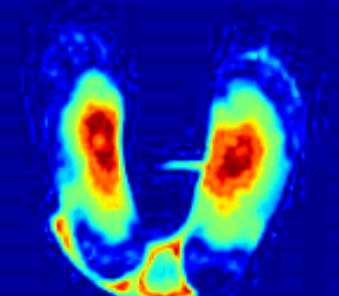

In [17]:
im

In [18]:
from PIL import Image
im = Image.fromarray(pix)
im.save("C:\\Users\\Family\\Desktop\\상현\\파이썬\\텍스트\\화재감지시스템\\적외선영상2.png")

In [19]:
import pandas as pd

data = pd.read_csv("C:\\Users\\Family\\Desktop\\상현\\파이썬\\텍스트\\화재감지시스템\\온도.csv", sep=",")
arr_cel = np.asarray(data.온도)
arr_cel = arr_cel.reshape(1000,1)
arr_cel.shape

data.head()

,번호,온도
0,1,19.374425
1,2,33.998988
2,3,18.681899
3,4,30.741560
4,5,21.291808


In [20]:
import PIL.Image as pilimg
import numpy as np

all_file_dim = []

for i in range(0,1000):
    filename = '적외선영상_' + str(i+1) + '.png'
    YOUR_IMAGE_PATH = "C:\\Users\\Family\\Desktop\\상현\\파이썬\\텍스트\\화재감지시스템\\YANG\\" + filename 
    
    # 이미지 읽어온다. 
    im = pilimg.open(YOUR_IMAGE_PATH)

    # 이미지보여주기
    #im.show()
    #print(filename)
    # 이미지픽셀데이터를 array로 바꿈
    pix = np.array(im)
    
    #array의 값을 0~1사이의 값으로 나타낸다. 
    pix = pix/255

    #각각의 차원을 계산해본다. 
    dim = pix.shape
    all_file_dim.append(dim) 
    
import pandas as pd 
frame = pd.DataFrame(all_file_dim , columns = ['x','y'])

#최대의 크기는 어느정도일까? 
np.max(frame.x) , np.max(frame.y) 

(197, 195)

In [21]:
import PIL.Image as pilimg
import numpy as np

pix_all = [] 

for i in range(0,1000):
    filename = '적외선영상_' + str(i+1) + '.png'
    YOUR_IMAGE_PATH = "C:\\Users\\Family\\Desktop\\상현\\파이썬\\텍스트\\화재감지시스템\\YANG\\" + filename 
    
    # 이미지를 읽어온다. 
    im = pilimg.open(YOUR_IMAGE_PATH)

    #print(filename)
    
    # 이미지데이터를 array로 바꾸면서 0~1사이의 값으로 바꾼다. 
    pix = np.array(im)
    pix = pix/255
    
    # 200*200 size에 맞게 복사한다. 
    width , height = pix.shape
    pix2 = np.zeros((200, 200))
    pix2[:width,:height] = pix
    pix2 = pix2.reshape(200,200,1) 
    
    # 한개의 이미지를 pix_all에 삽입한다. 
    pix_all.append(pix2)

# array로 바꾼다.     
arr_pix_all = np.asarray(pix_all)

In [22]:
cnt = 1
pix_train = [] 
pix_test = [] 
pix_valid = [] 

for i in arr_pix_all:
       
    if cnt <= 600:
        pix_train.append(i)
    elif cnt > 600 and cnt <= 900:
        pix_valid.append(i)
    else:
        pix_test.append(i)
        
    #print(cnt) 
    cnt += 1

arr_pix_train = np.asarray(pix_train)
arr_pix_test = np.asarray(pix_test)
arr_pix_valid = np.asarray(pix_valid)

In [23]:
cnt = 1
cel_train = [] 
cel_test = [] 
cel_valid = [] 

for i in arr_cel:
       
    if cnt <= 600:
        cel_train.append(i)
    elif cnt > 600 and cnt <= 900:
        cel_valid.append(i)
    else:
        cel_test.append(i)
        
    #print(cnt) 
    cnt += 1

arr_cel_train = np.asarray(cel_train)
arr_cel_test = np.asarray(cel_test)
arr_cel_valid = np.asarray(cel_valid)

print(arr_pix_train.shape , arr_pix_test.shape , arr_pix_valid.shape)
print(arr_cel_train.shape , arr_cel_test.shape , arr_pix_valid.shape)

(600, 200, 200, 1) (100, 200, 200, 1) (300, 200, 200, 1)
(600, 1) (100, 1) (300, 200, 200, 1)


In [24]:
# 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten
from keras.layers import Conv2D , MaxPooling2D

#이미지의 크기 세팅 
width = 200
height = 200

x_train, y_train = arr_pix_train , arr_cel_train
x_val, y_val = arr_pix_valid , arr_cel_valid
x_test, y_test = arr_pix_test , arr_cel_test

# 모델 구성하기
model = Sequential()
model.add(Conv2D(64,(3,3) , activation='relu' , input_shape=(width,height,1))) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(64,(3,3) , activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten()) 
model.add(Dense(512 , activation='relu')) 
model.add(Dense(1)) 

# 컴파일
model.compile(loss='mse', optimizer='adam')

# 학습 
hist = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_val, y_val))

Using TensorFlow backend.
C:\Users\Family\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Family\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Family\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Family\anaconda3\lib\site-packages\tensorflow\python\framework\dtype



Train on 600 samples, validate on 300 samples
Epoch 1/30
600/600 [==============================] - 21s 34ms/step - loss: 295.5036 - val_loss: 124.8719
Epoch 2/30
600/600 [==============================] - 20s 34ms/step - loss: 67.5438 - val_loss: 67.4750
Epoch 3/30
600/600 [==============================] - 20s 34ms/step - loss: 48.0944 - val_loss: 49.4523
Epoch 4/30
600/600 [==============================] - 20s 34ms/step - loss: 39.6080 - val_loss: 47.2907
Epoch 5/30
600/600 [==============================] - 20s 34ms/step - loss: 38.9268 - val_loss: 45.7449
Epoch 6/30
600/600 [==============================] - 20s 33ms/step - loss: 37.4726 - val_loss: 51.8482
Epoch 7/30
600/600 [==============================] - 20s 33ms/step - loss: 36.8309 - val_loss: 46.6575
Epoch 8/30
600/600 [==============================] - 20s 34ms/step - loss: 36.4002 - val_loss: 44.6051
Epoch 9/30
600/600 [==============================] - 20s 33ms/step - loss: 34.8852 - val_loss: 43.3157
Epoch 10/30
60

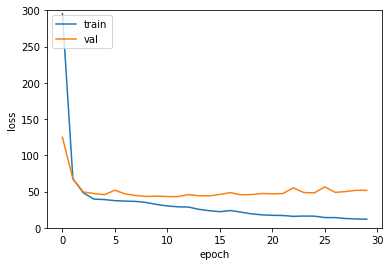

100/100 [==============================] - 1s 7ms/step
40.05120216369629


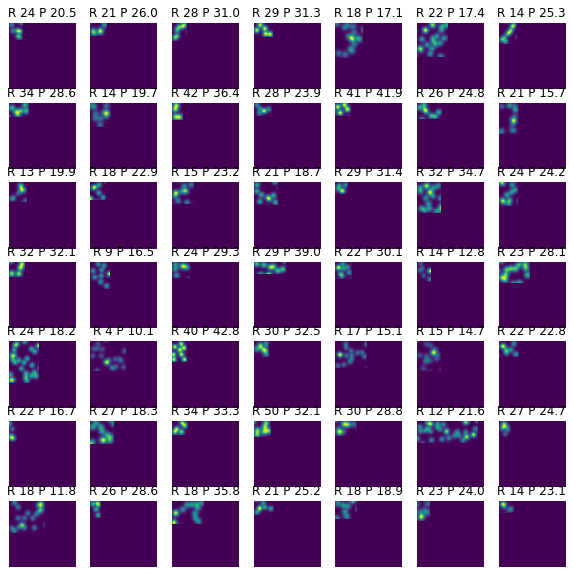

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 300.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)

print(score)

yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 7
plt_col = 7

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[(int)(i/plt_row), i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()